<a href="https://colab.research.google.com/github/byrongomezjr/AAPLStockForecastingWithLSTMs/blob/main/AAPLStockForecastingWithLSTMs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [129]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#load dataset

In [130]:
#load dataset
from google.colab import files
dataset = files.upload()

Saving aapl.csv to aapl.csv


In [131]:
df = pd.read_csv('aapl.csv')

In [132]:
df.shape

(2392, 7)

In [133]:
df = df['Open'].values
df = df.reshape(-1,1)

In [134]:
df.shape

(2392, 1)

In [135]:
dataset_train = np.array(df[:int(df.shape[0]*0.8)])
dataset_test = np.array(df[int(df.shape[0]*0.8):])

print(dataset_train.shape)
print(dataset_test.shape)

(1913, 1)
(479, 1)


#importing the module

In [136]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential, load_model
from keras.layers import LSTM, Dense, Dropout

#scaling data

In [137]:
scaler = MinMaxScaler(feature_range=(0,1))
dataset_train = scaler.fit_transform(dataset_train)
dataset_test = scaler.transform(dataset_test)
dataset_train[:10]

array([[0.55047974],
       [0.4880597 ],
       [0.38757996],
       [0.42835821],
       [0.38869936],
       [0.46636461],
       [0.42094883],
       [0.48512793],
       [0.5065032 ],
       [0.52734542]])

In [138]:
dataset_test = scaler.transform(dataset_test)
dataset_test[:10]

array([[-0.06902343],
       [-0.06906179],
       [-0.06909191],
       [-0.06910611],
       [-0.06906179],
       [-0.06906435],
       [-0.0690706 ],
       [-0.0690831 ],
       [-0.0690706 ],
       [-0.06909361]])

# creating our datasets

In [139]:
def create_dataset(df):
  x = []
  y = []
  for i in range(50, df.shape[0]):
    x.append(df[i-50:i, 0])
    y.append(df[i, 0])
  x = np.array(x)
  y = np.array(y)
  return x,y

# training and testing data

In [140]:
x_train, y_train = create_dataset(dataset_train)
x_test, y_test = create_dataset(dataset_test)

# reshaping our data, turning it into a 3D array

In [141]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

#model building

In [142]:
model = Sequential()
model.add(LSTM(units=96, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=96, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=96, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=96))
model.add(Dropout(0.2))
model.add(Dense(units=1))

In [143]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [144]:
model.compile(loss='mean_squared_error', optimizer='adam')

# start training

In [145]:
model.fit(x_train, y_train, epochs=50, batch_size=32)
model.save('stock_prediction.h5')

Epoch 1/50
59/59 [==============================] - 20s 195ms/step - loss: 0.0159
Epoch 2/50
59/59 [==============================] - 10s 174ms/step - loss: 0.0028
Epoch 3/50
59/59 [==============================] - 12s 205ms/step - loss: 0.0025
Epoch 4/50
59/59 [==============================] - 10s 174ms/step - loss: 0.0023
Epoch 5/50
59/59 [==============================] - 10s 175ms/step - loss: 0.0021
Epoch 6/50
59/59 [==============================] - 10s 175ms/step - loss: 0.0024
Epoch 7/50
59/59 [==============================] - 10s 176ms/step - loss: 0.0020
Epoch 8/50
59/59 [==============================] - 10s 174ms/step - loss: 0.0018
Epoch 9/50
59/59 [==============================] - 10s 176ms/step - loss: 0.0018
Epoch 10/50
59/59 [==============================] - 10s 177ms/step - loss: 0.0020
Epoch 11/50
59/59 [==============================] - 10s 177ms/step - loss: 0.0023
Epoch 12/50
59/59 [==============================] - 11s 179ms/step - loss: 0.0016
Epoch 13/50
5

#loading our model

In [146]:
model = load_model('stock_prediction.h5')

#data visualization

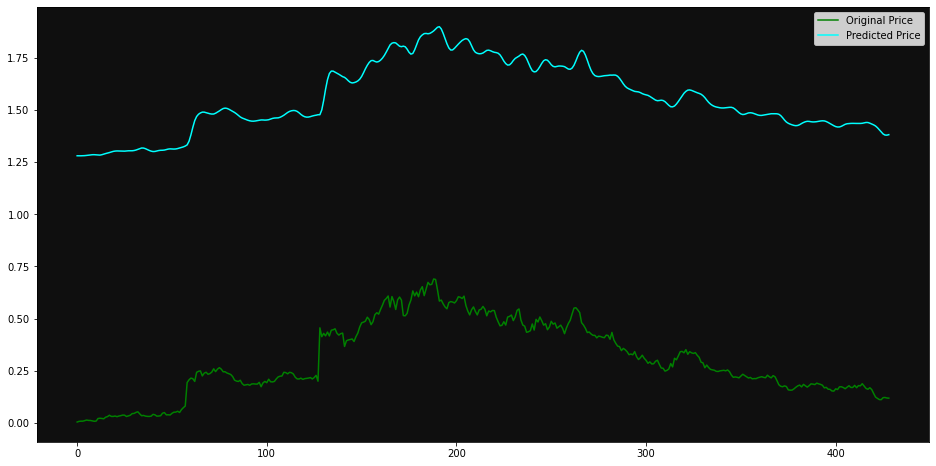

In [147]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
y_test_scaled = scaler.inverse_transform(y_test.reshape(-1,1))

fig, ax = plt.subplots(figsize=(16,8))
ax.set_facecolor('#0f0f0f')
ax.plot(y_test_scaled, color='green', label='Original Price')
plt.plot(predictions, color='cyan', label='Predicted Price')
plt.legend()